<a href="https://colab.research.google.com/github/Vaibhavyadav350/AI-Learnings/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Social_Network_new.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df['Age'].max()

60

In [ ]:
df['EstimatedSalary'].min()

15000

In [ ]:
df.shape

(400, 5)

In [ ]:
# Output : Purchased column

In [ ]:
# Input : Age and EstimatedSalary

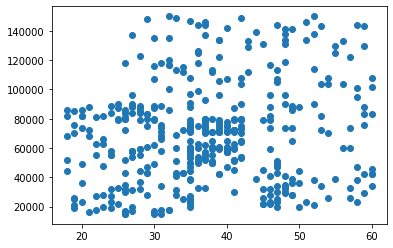

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'],df['EstimatedSalary'])
plt.show()

In [ ]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
257/400*100

64.25

In [ ]:
143/400*100

35.75

In [ ]:
p_df = df[df['Purchased']==1]
np_df = df[df['Purchased']==0]
p_df

,User ID,Gender,Age,EstimatedSalary,Purchased
7,15694829,Female,32,150000,1
16,15733883,Male,47,25000,1
17,15617482,Male,45,26000,1
18,15704583,Male,46,28000,1
19,15621083,Female,48,29000,1
...,...,...,...,...,...
393,15635893,Male,60,42000,1
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1


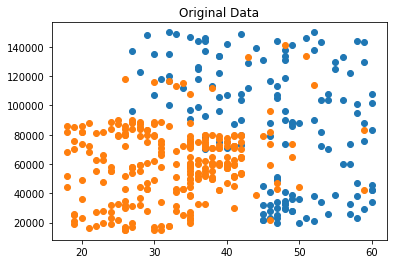

In [ ]:
plt.scatter(p_df['Age'],p_df['EstimatedSalary'])
plt.scatter(np_df['Age'],np_df['EstimatedSalary'])
plt.title('Original Data')
plt.show()

In [ ]:
x = df.iloc[:,2:4].values
y = df.iloc[:,4].values

In [ ]:
# Splitting of data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(300, 2)
(100, 2)


In [ ]:
print(x_train[0:5])

[[    57 122000]
 [    39  71000]
 [    47  25000]
 [    24  19000]
 [    36  50000]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) # No need of applying fit in test data

In [ ]:
print(x_train[0:5])

[[0.92857143 0.79259259]
 [0.5        0.41481481]
 [0.69047619 0.07407407]
 [0.14285714 0.02962963]
 [0.42857143 0.25925926]]


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, y_train)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [ ]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(y_pred,y_test)

array([[62, 12],
       [ 1, 25]])

In [ ]:
# Accuracy = (62+25)/(62+12+1+25)

In [ ]:
(62+25)/(62+12+1+25)

0.87

In [ ]:
accuracy_score(y_pred,y_test)

0.87

In [ ]:
# Predict only for one value

In [ ]:
op = [[51,23000]]
op = scaler.transform(op)
clf.predict(op)

array([0])

In [ ]:
# Plot decision region

In [ ]:
!pip install mlxtend==0.19.0

     |████████████████████████████████| 1.3 MB 5.0 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
import mlxtend
mlxtend.__version__

'0.19.0'

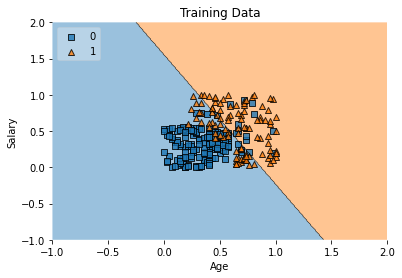

In [ ]:
# Plotting decision regions
plot_decision_regions(x_train, y_train, clf, legend=2)

# Adding axes annotations
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Training Data')
plt.show()

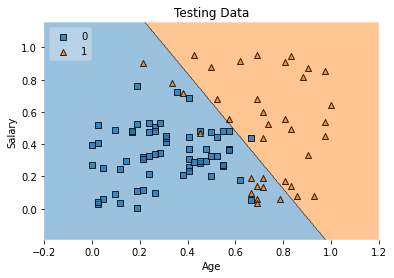

In [ ]:
# Plotting decision regions
plot_decision_regions(x_test, y_test, clf,zoom_factor=5, legend=2)

# Adding axes annotations
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Testing Data')
plt.show()

In [ ]:
# Probabilities

In [ ]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [ ]:
clf.predict_proba(x_test)

array([[0.69253784, 0.30746216],
       [0.12791454, 0.87208546],
       [0.91620662, 0.08379338],
       [0.29978997, 0.70021003],
       [0.93028939, 0.06971061],
       [0.86047696, 0.13952304],
       [0.27879648, 0.72120352],
       [0.82096332, 0.17903668],
       [0.61103403, 0.38896597],
       [0.60416961, 0.39583039],
       [0.76913597, 0.23086403],
       [0.44976191, 0.55023809],
       [0.94643195, 0.05356805],
       [0.97568027, 0.02431973],
       [0.79144976, 0.20855024],
       [0.59103782, 0.40896218],
       [0.45814466, 0.54185534],
       [0.450667  , 0.549333  ],
       [0.76925761, 0.23074239],
       [0.26092699, 0.73907301],
       [0.96742635, 0.03257365],
       [0.8293682 , 0.1706318 ],
       [0.66397927, 0.33602073],
       [0.15624312, 0.84375688],
       [0.97978777, 0.02021223],
       [0.55849055, 0.44150945],
       [0.53283437, 0.46716563],
       [0.77091638, 0.22908362],
       [0.10045946, 0.89954054],
       [0.97900397, 0.02099603],
       [0.

In [ ]:
# Note: If dataset is imbalanced, then accuracy score is not a good measure for evaluation
# Either Recall or Precision

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(y_pred,y_test)

array([[62, 12],
       [ 1, 25]])

In [ ]:
# Precision : It is the ratio between True Positive and all positives

# P_1 = TP/(TP+FP)
# P_0 = TN/(TN+FN)


In [ ]:
from sklearn.metrics import precision_score
p_p = precision_score(y_pred,y_test,p)